# Feature Matching

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the images

In [2]:
img1 = cv2.imread('image1.jpg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('image2.jpg', cv2.IMREAD_GRAYSCALE)

# Initialize SIFT detector

In [3]:
sift = cv2.SIFT_create()

# Detect key points and compute descriptors

In [4]:
keypoints1, descriptors1 = sift.detectAndCompute(img1, None)
keypoints2, descriptors2 = sift.detectAndCompute(img2, None)

# Initialize the Brute-Force Matcher

In [5]:
bf = cv2.BFMatcher()

# Match descriptors using KNN

In [6]:
matches = bf.knnMatch(descriptors1, descriptors2, k=2)

# Apply ratio test to keep good matches

In [7]:
good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append(m)

# Draw the matches

In [8]:
matching_result = cv2.drawMatches(img1, keypoints1, img2, keypoints2, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Convert the matching result to RGB for displaying with matplotlib

In [9]:
matching_result_rgb = cv2.cvtColor(matching_result, cv2.COLOR_BGR2RGB)

# Display the result using matplotlib

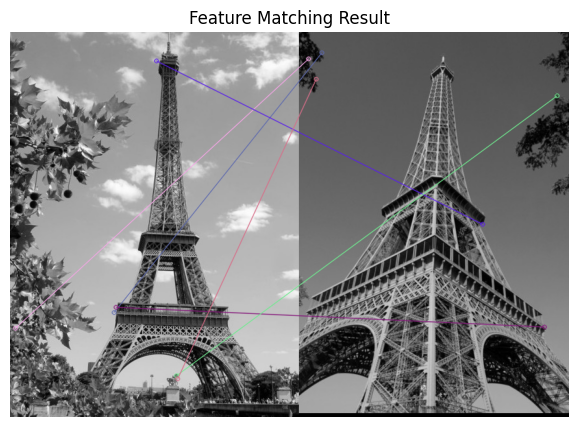

In [10]:
plt.figure(figsize=(10, 5))
plt.imshow(matching_result_rgb)
plt.title('Feature Matching Result')
plt.axis('off')
plt.show()